In [1]:
import pickle
from universal.algos import *
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from universal import tools
from universal import result
from itertools import chain
from PPO import PPO
from torch.distributions import Categorical
from env.Portfolio_management import CustomEnv
import seaborn as sns
EPISODES = 1000
lr = 0.001
gamma = 0.98
lmbda = 0.95
epochs = 3
eps_clip = 0.2
MAX_STEPS = 2835

E:\anaconda\envs\protfoilo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./Stock Market/HangSeng_close.csv')
df_original_train = df.head(round(0.8*len(df)))
df_original_test = df.tail(round(0.2*len(df)))

df_ob = pd.read_csv('./Stock Market/HangSeng_final.csv')
df_ob_train = df_ob.head(round(0.8 * len(df_ob)))
df_ob_test = df_ob.tail(round(0.2 * len(df_ob)))
train_set = (df_ob_train - np.mean(df_ob_train.to_numpy())) / np.std(df_ob_train.to_numpy())
test_set = (df_ob_test - np.mean(df_ob_train.to_numpy())) / np.std(df_ob_train.to_numpy())
train_set = pd.DataFrame(train_set)
test_set = pd.DataFrame(test_set)

In [3]:
total_reward = []
for i in range(31):
    if i >0:
        pkl_file = open('model/'+ str(i*100) +'.pkl', 'rb')
        model = pickle.load(pkl_file)
        n_epi =0
        total_test_reward = []
        total_portfolio_wealth = []
        stock_weight = []
        stock_weight = pd.DataFrame(stock_weight)
        total_step_test = len(train_set)//10 - 2


        env = CustomEnv(df_original_train,train_set)
        s = env.reset()  # observation
        done = False
        t = 0
        test_reward_list = 1
        n_epi +=1
        h_out = (torch.zeros([1, 1, 32], dtype=torch.float), torch.zeros([1, 1, 32], dtype=torch.float))

        test_action_list = []
        punishment = 0
        s = np.append(s, punishment)
        a = 0
        done = False
        t = 0
        my_total_wealth = 1
        while (done == False):
            t = t + 1
            h_in = h_out
            prob, h_out = model.pi(torch.from_numpy(s.reshape(-1)).float(), h_in)
            prob = prob.view(-1)
            np_array= prob.detach().numpy()
            #print(prob)
            count = np_array.shape[0]
            for i in range(count):
                 if np_array[i] == np_array.max():
                    action = i
                    break;

            #print(action)
            next_s, r, done, _, result = env.step(action)    
            r = r / 20

            test_reward_list = test_reward_list * (1+r)
            total_portfolio_wealth.append(test_reward_list)
            a=a+1
            test_action_list.append(action)
            test_action_counter = max(np.bincount(test_action_list))
            test_most_action = np.argmax(np.bincount(test_action_list))

            if action == test_most_action and test_action_counter > total_step_test // 3:
                punishment = 1
                s[len(s) - 1] = punishment
            else:
                punishment = 0
                s[len(s) - 1] = punishment
            next_s = np.append(next_s, punishment)
            stock_weight = stock_weight.append(result.B)

            s = next_s
            if done:
                break
        print(test_reward_list)
        total_reward.append(test_reward_list)

21.522990530386483
21.675580290154453
26.67398355880637
53.7347991692052
21.675580290154453
21.675580290154453
22.78561571362425
22.574071435654925
22.075626752052358
22.236722981251173
22.53725555967052
21.398024070036243
21.803945992526383
21.892458805348145
22.494969486662963
22.555183671475657
22.971855093784583
22.504184752292094
24.54404857573548
23.10577352047954
22.18404538479676
29.20884352508358
53.68191831238085
75.63015784675342
52.2619984280921
69.08956903193108
93.18586223121501
48.87424958803762
80.045970206987
108.32843773063267


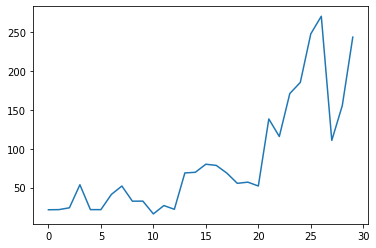

In [7]:
plt.plot(total_reward)
plt.show()

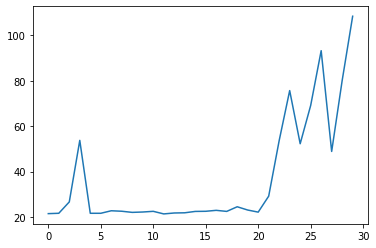

In [4]:
plt.plot(total_reward)
plt.show()

In [121]:
sp_data = pd.read_csv('./Stock Market/NIKKEI_close.csv')
test_set = sp_data.tail(round(0.2*len(sp_data)))
test_set = sp_data.head(round(0.8 * len(sp_data)))

In [122]:
new_test = test_set.iloc[1510:1520]
algo = WMAMR()
result = algo.run(sp_data)
print(result.total_wealth)

0.4244386014444006


In [123]:
result.B

,1332.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1925.T,1928.T,...,9502.T,9503.T,9531.T,9532.T,9602.T,9613.T,9735.T,9766.T,9983.T,9984.T
0,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,...,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651
1,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,...,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651,0.004651
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.391260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.268059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.113784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
a = result.X >2

In [118]:
a

,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0012.HK,0016.HK,0017.HK,0027.HK,...,2313.HK,2318.HK,2319.HK,2331.HK,2382.HK,2388.HK,2628.HK,2688.HK,3968.HK,3988.HK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
a.replace("False","NaN")

,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0012.HK,0016.HK,0017.HK,0027.HK,...,2313.HK,2318.HK,2319.HK,2331.HK,2382.HK,2388.HK,2628.HK,2688.HK,3968.HK,3988.HK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
a.to_csv("NIKKEI_aberrant.csv",index=False,header=True)

In [41]:
result.B.to_csv("1510.csv",index=False,header=True)

In [42]:
r = result.B *(result.X-1)

In [43]:
r = r.sum(axis=1) + 1
r

1510    1.000000
1511    0.959425
1512    8.234074
1513    1.000755
1514    1.000434
1515    0.982263
1516    0.987803
1517    1.007916
1518    0.990770
1519    1.028954
dtype: float64

In [22]:
r.prod()

10.17789429972753